# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [135]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
#篩選數值類型的欄位(非object)
dtype_select = app_train.dtypes.reset_index()
dtype_select.columns = ['name','dtype']
dtype_select = app_train_dtype[dtype_select['dtype'] != object]
dtype_select = dtype_select['name'].values
#dtype_select
#app_train[dtype_select].dtypes

dtype_select = app_train[dtype_select].nunique().reset_index()
dtype_select.columns = ['name','count']
dtype_select = dtype_select[dtype_select['count'] != 2]
dtype_select = dtype_select['name'].values

dtype_select

array(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       '

In [137]:
app_train[dtype_select].describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


SK_ID_CURR


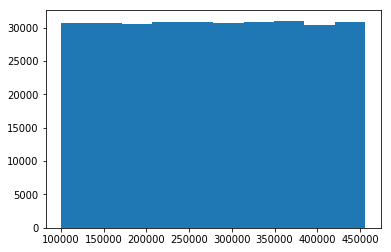

CNT_CHILDREN


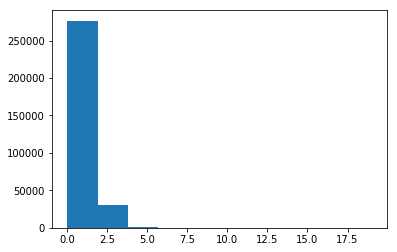

AMT_INCOME_TOTAL


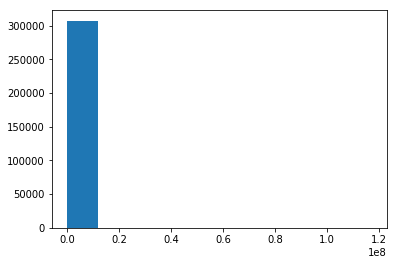

AMT_CREDIT


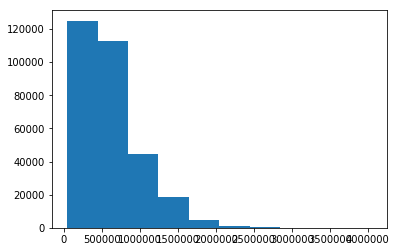

AMT_ANNUITY


ValueError: max must be larger than min in range parameter.

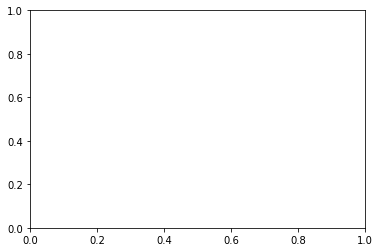

In [138]:
for name in dtype_select:
    print(name)
    plt.hist(app_train[name])
    plt.show()

In [139]:
#檢查是否有空值，因為畫直方圖時會報錯
#果然一堆空
"""
 'max must be larger than min in range parameter
"""
print(app_train[dtype_select].isnull().sum())

SK_ID_CURR                           0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
CNT_FAM_MEMBERS                      2
REGION_RATING_CLIENT                 0
REGION_RATING_CLIENT_W_CITY          0
HOUR_APPR_PROCESS_START              0
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG            

In [140]:
app_train.iloc[:,0:1].median()

SK_ID_CURR    278202.0
dtype: float64

In [141]:
#太多空值，決定用中位數來填充
for name in dtype_select:
    app_train[name].fillna(app_train[name].median(),inplace = True)


In [142]:
#再次檢查空值
_ = app_train[dtype_select].isnull().sum().reset_index()
_[_.columns[1]].nunique()
#唯一數值為1，代表都是0

1

In [178]:
#把非二值的數值欄位做標準化，然後畫boxplot
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() #z-scaler物件
app_train_scaled = pd.DataFrame(scale.fit_transform(app_train[dtype_select]),
                                columns=app_train[dtype_select].keys())

app_train_scaled

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733423,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,0.379837,...,4.163504,0.252132,5.253260,-0.206992,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-0.440926
1,-1.733413,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,1.078697,...,-0.320480,-0.168527,-0.275663,0.163107,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-1.007331
2,-1.733403,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,...,-0.320480,-0.589187,-0.275663,0.178831,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-1.007331
3,-1.733384,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,...,-0.320480,0.252132,-0.275663,0.418306,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-0.440926
4,-1.733374,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892535,-0.473210,0.191639,...,-0.320480,-0.589187,-0.275663,-0.173126,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-1.007331
5,-1.733364,-0.577538,-0.294354,-0.269648,0.028221,-0.226967,1.078997,-0.207151,-0.462947,0.004576,...,-0.320480,-0.589187,-0.275663,-1.902674,-0.070987,-0.058766,-0.155837,-0.269947,1.035362,-0.440926
6,-1.733354,0.807273,0.009287,2.389375,0.979237,2.319823,1.078997,0.517645,-0.473862,1.071033,...,-0.320480,-0.168527,-0.275663,-0.724646,-0.070987,-0.058766,-0.155837,0.897175,1.035362,0.125480
7,-1.733345,-0.577538,0.806342,2.313036,1.032641,2.685391,-1.283044,-0.644596,-0.454884,0.110455,...,-0.320480,0.252132,-0.275663,-0.129585,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-1.007331
8,-1.733335,-0.577538,-0.237421,1.044955,0.463521,1.015964,-0.161526,-0.930803,2.133617,-0.692865,...,-0.320480,-0.168527,-0.275663,1.164552,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-0.440926
9,-1.733325,-0.577538,-0.142533,-0.482064,-0.473213,-0.361009,-0.085250,0.359304,-0.465997,-2.682714,...,-0.320480,0.252132,-0.275663,-0.858898,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-0.440926


In [180]:
app_train[dtype_select]

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0.0,2.0,0.0,-1673.0,0.0,0.0,0.0,0.0,0.0,1.0


0


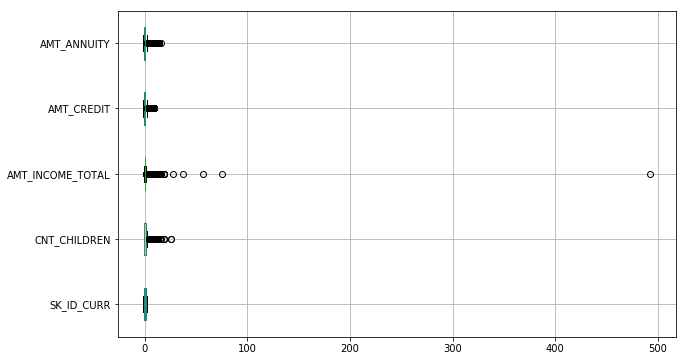

1


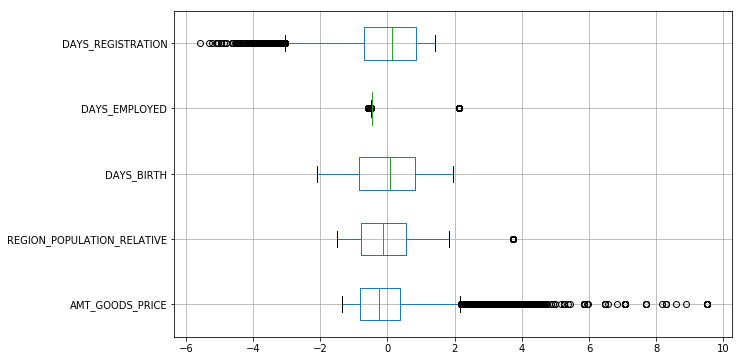

2


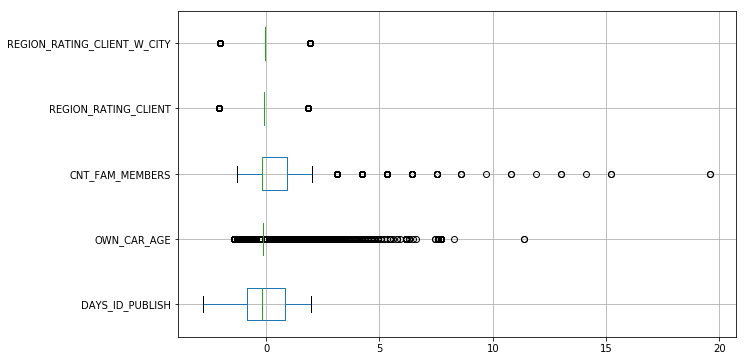

3


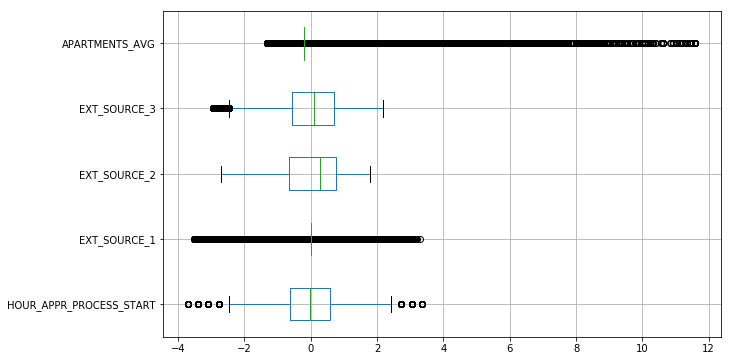

4


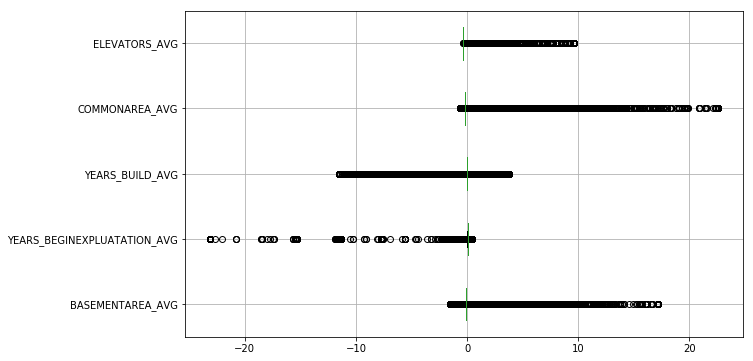

5


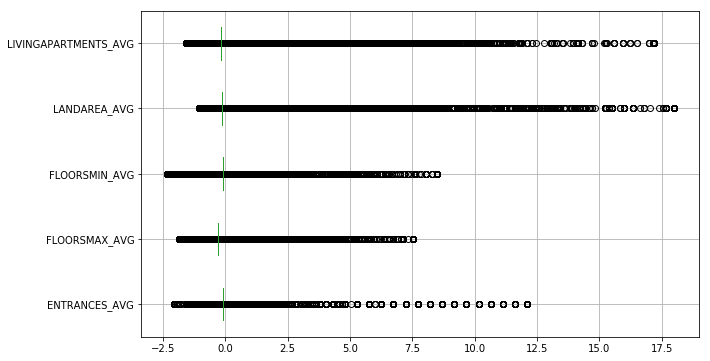

6


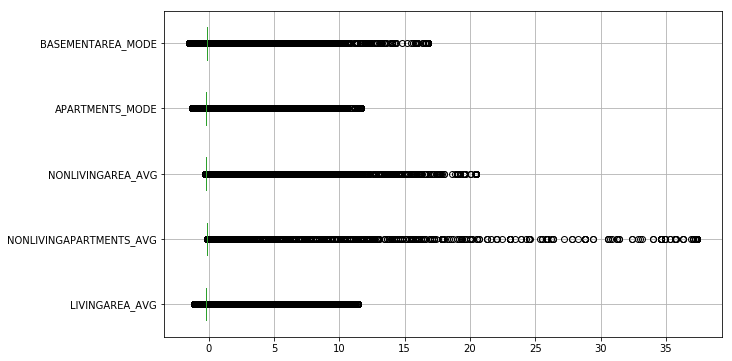

7


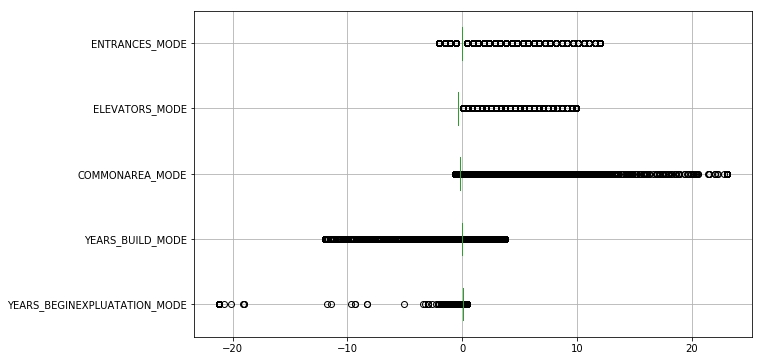

8


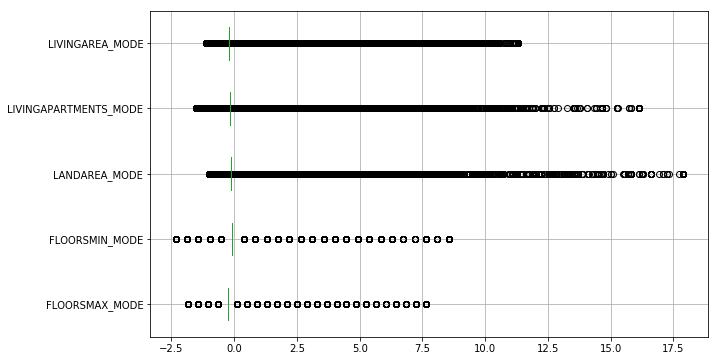

9


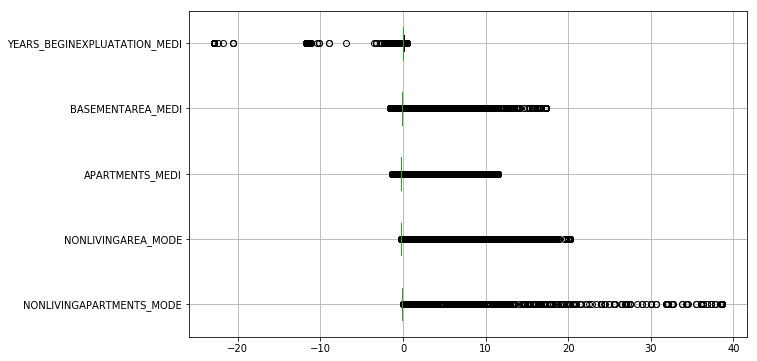

10


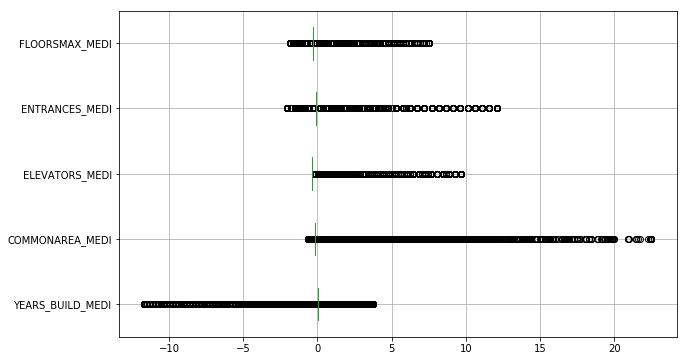

11


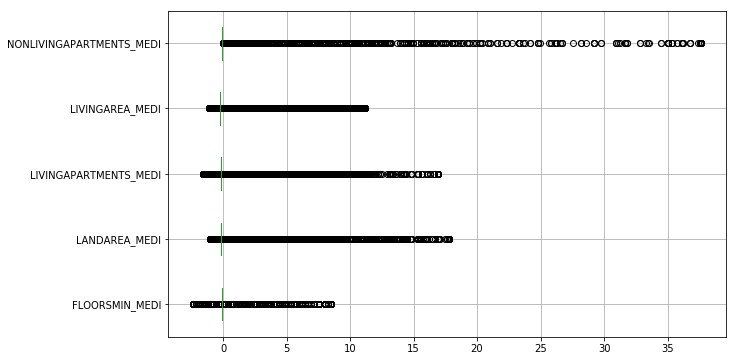

12


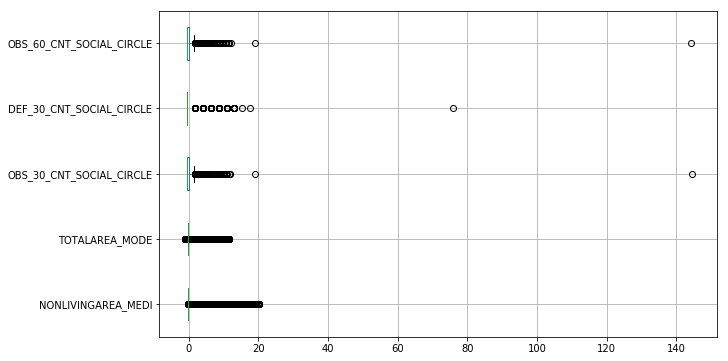

13


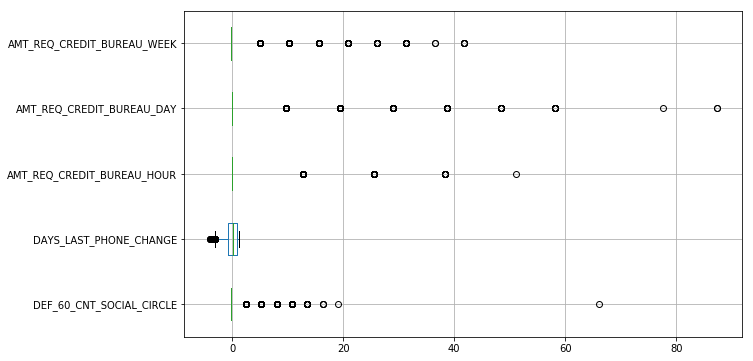

14


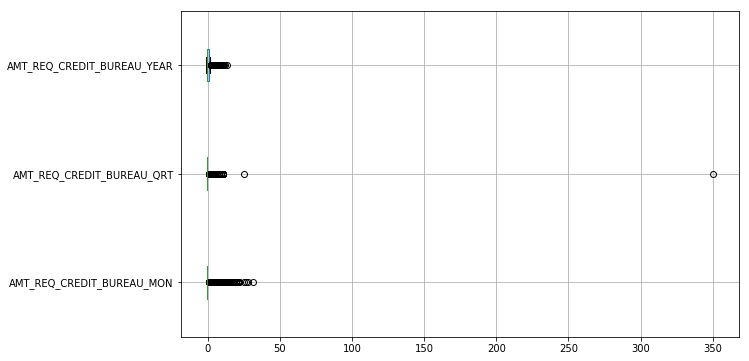

In [144]:
#參考 https://www.jianshu.com/p/73dcb115b887
# https://blog.csdn.net/shuaishuai3409/article/details/51428106
#改畫成boxplot，每5個欄畫一個boxbplot
for i in range(0,int(len(dtype_select)/5)+1):
    plt.figure(1, figsize=(10, 6))
    print(i)
    app_train_scaled[dtype_select[0+i*5:5+i*5]].boxplot(vert=False)


    plt.show()

In [ ]:
for name in dtype_select:
    print(name)
    plt.hist(app_train[name])
    plt.show()

boxplot比較能看出離群值，不過出現離群值不一定代表有問題，例如擁有公寓的時間，本來就會有大量分散的資料
從上面的圖檢查的結果，至少這三個欄位好像有點可疑
AMT_INCOME_TOTOAL
DAYS_EMPLOYED
REGION_POPULATION_RELATIVE
OBS_60_CNT_SOCIAL_CIRCLE

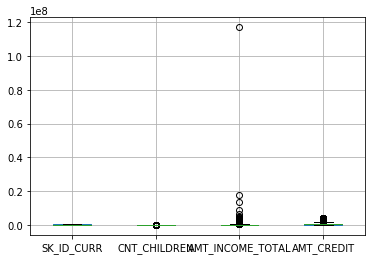

In [177]:
app_train[dtype_select[0:4]].boxplot()

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [133]:
np.dtype('float64')

dtype('float64')

In [147]:
# 另外一種篩選的方式，更加簡潔
# 先篩選數值型的欄位
dtype_select_num = [np.dtype('float64'),np.dtype('float64')]
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select_num))])
numeric_columns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [151]:

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" , len(numeric_columns))


Numbers of remain columns 65


In [ ]:

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    
    plt.show()

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [152]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


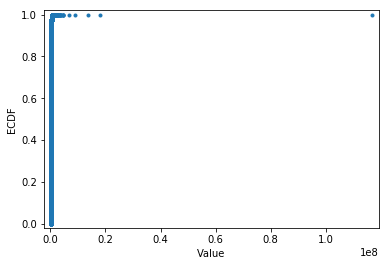

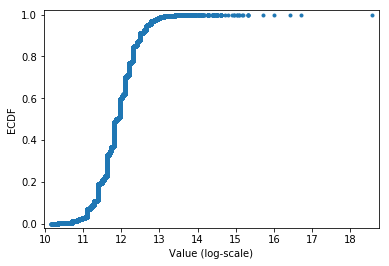

In [182]:
columnName = 'AMT_INCOME_TOTAL'
print(app_train[columnName].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train[columnName]
x = np.sort(cdf)
y = np.arange(1,len(x)+1)/ len(x)

plt.plot(x,y,marker = '.' , linestyle = 'none')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

#把x變成 log
x = np.log(x)
plt.plot(x,y,marker = '.' , linestyle = 'none')
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


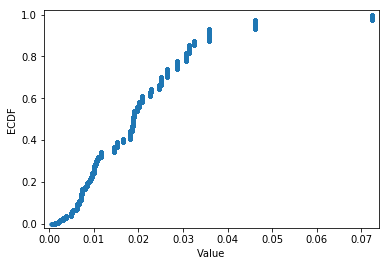

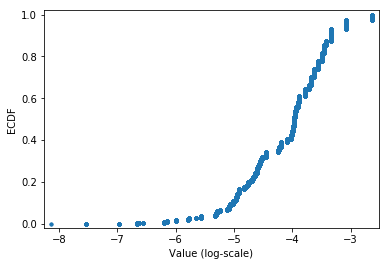

In [183]:
columnName = 'REGION_POPULATION_RELATIVE'
print(app_train[columnName].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train[columnName]
x = np.sort(cdf)
y = np.arange(1,len(x)+1)/ len(x)

plt.plot(x,y,marker = '.' , linestyle = 'none')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

#把x變成 log
x = np.log(x)
plt.plot(x,y,marker = '.' , linestyle = 'none')
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


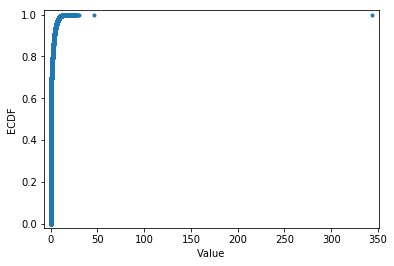

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


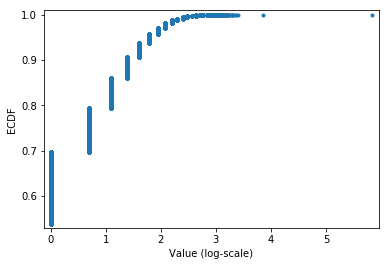

In [181]:
# 繪製 Empirical Cumulative Density Plot (ECDF)

columnName = 'OBS_60_CNT_SOCIAL_CIRCLE'
print(app_train[columnName].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train[columnName]
x = np.sort(cdf)
y = np.arange(1,len(x)+1)/ len(x)

plt.plot(x,y,marker = '.' , linestyle = 'none')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

#把x變成 log
x = np.log(x)
plt.plot(x,y,marker = '.' , linestyle = 'none')
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [194]:
loc_a.sum()

307385

去除極端值之前=====


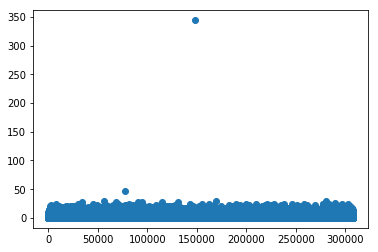

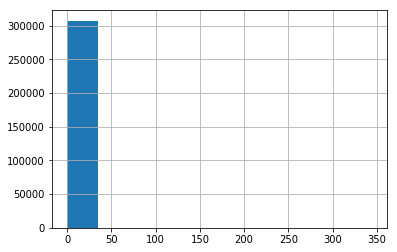

去除極端值之後=====


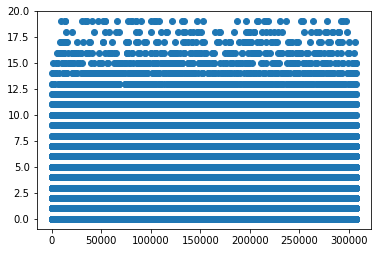

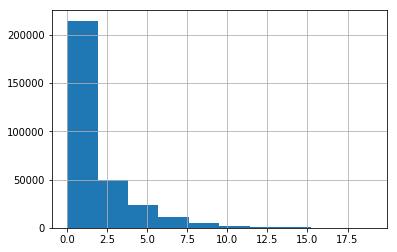

In [197]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
print('去除極端值之前=====')
x = range( len(app_train['OBS_60_CNT_SOCIAL_CIRCLE']) )
y = app_train['OBS_60_CNT_SOCIAL_CIRCLE']
plt.scatter(x,y)
plt.show()

loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] 
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

print('去除極端值之後=====')


loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

plt.scatter(range(loc_a.sum()),app_train.loc[loc_a, loc_b] )
plt.show()

app_train.loc[loc_a, loc_b].hist()
plt.show()

# 以下是作業預設範例程式

In [167]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train['OBS_60_CNT_SOCIAL_CIRCLE']
cdf = np.sort(cdf)

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [ ]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

In [ ]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [ ]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = 
loc_b = 

app_train.loc[loc_a, loc_b].hist()
plt.show()